In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
#import ipy_autoreload
#%autoreload 2
#%aimport your_mod

In [3]:
sys.path.append("./utils/")

In [4]:
import hierarcical_utils as hu
import plot_utils as pu 

In [5]:
import importlib
hu = importlib.reload(hu)

In [6]:
import os 

In [7]:
plt.figure(figsize  =(12, 8))
for pn in path_names:
    with open(pn) as f:
        lines = [x[: -1].split("\t") for x in f.readlines()]

    plt.hist([len(x) for y in lines for x in y], label = pn, log=1)
    
plt.legend()

NameError: name 'path_names' is not defined

In [7]:
path = "../data/clostr_Polina/pairs_0_err/"
names = [x for x in os.listdir(path) ]

In [8]:
path_names = sorted([path + x for x in names])

In [9]:
from multiprocessing import Pool

In [18]:
pool = Pool(4)

reading pairs, clustering...
reading pairs, clustering...
reading pairs, clustering...
reading pairs, clustering...
making sp_to_n...
making sp_to_n...
making sp_to_n...
making sp_to_n...


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget


processing pairs...

processing pairs...


A Jupyter Widget

A Jupyter Widget


processing pairs...


A Jupyter Widget


processing pairs...


A Jupyter Widget


making graph...
reading pairs, clustering...
making sp_to_n...


A Jupyter Widget


processing pairs...


A Jupyter Widget


making graph...
reading pairs, clustering...
making sp_to_n...


A Jupyter Widget


processing pairs...


A Jupyter Widget


making graph...
reading pairs, clustering...
making sp_to_n...


A Jupyter Widget


making graph...
reading pairs, clustering...
making sp_to_n...


A Jupyter Widget


processing pairs...


A Jupyter Widget


processing pairs...


A Jupyter Widget


making graph...

making graph...
reading pairs, clustering...
making sp_to_n...
reading pairs, clustering...
making sp_to_n...


A Jupyter Widget

A Jupyter Widget


processing pairs...


A Jupyter Widget


processing pairs...


A Jupyter Widget


making graph...
reading pairs, clustering...
making sp_to_n...


A Jupyter Widget


processing pairs...


A Jupyter Widget


making graph...
reading pairs, clustering...
making sp_to_n...


A Jupyter Widget


processing pairs...


A Jupyter Widget


making graph...
reading pairs, clustering...
making sp_to_n...


A Jupyter Widget


processing pairs...


A Jupyter Widget


making graph...
reading pairs, clustering...

making graph...
making sp_to_n...


A Jupyter Widget


processing pairs...


A Jupyter Widget


making graph...

making graph...

making graph...


In [11]:
pool.close()

In [13]:
path_names = sorted([path + x for x in names])

In [14]:
def f(x):
    return hu.graph_from_raw(x, "\t")

In [19]:
res = pool.map(f, path_names)

In [20]:
res = dict(zip(sorted(names), res))

In [ ]:
print(322)

In [16]:
res

NameError: name 'res' is not defined

In [202]:
names

['Polina-7_S17_L001_R1_001',
 'Polina-2_S12_L001_R2_001',
 'Polina-7_S17_L001_R2_001',
 'Polina-6_S16_L001_R2_001',
 'Polina-1_S11_L001_R1_001',
 'Polina-2_S12_L001_R1_001',
 'Polina-6_S16_L001_R1_001',
 'Polina-3_S13_L001_R1_001',
 'Polina-4_S14_L001_R1_001',
 'Polina-5_S15_L001_R2_001',
 'Polina-4_S14_L001_R2_001',
 'Polina-3_S13_L001_R2_001',
 'Polina-5_S15_L001_R1_001',
 'Polina-1_S11_L001_R2_001']

In [215]:
res = {}

for name in tqdm_notebook(names[:]): 
    res[name] = hu.graph_from_raw(path + name, split='\t')

A Jupyter Widget

reading pairs, clustering...
making sp_to_n...


A Jupyter Widget

processing pairs...


A Jupyter Widget

making graph...



In [161]:
res_sof.keys()

dict_keys(['Polina-7_S17_L001_R1_001_12_11pairsq10.txt', 'Polina-2_S12_L001_R1_001_12_11pairsq10.txt'])

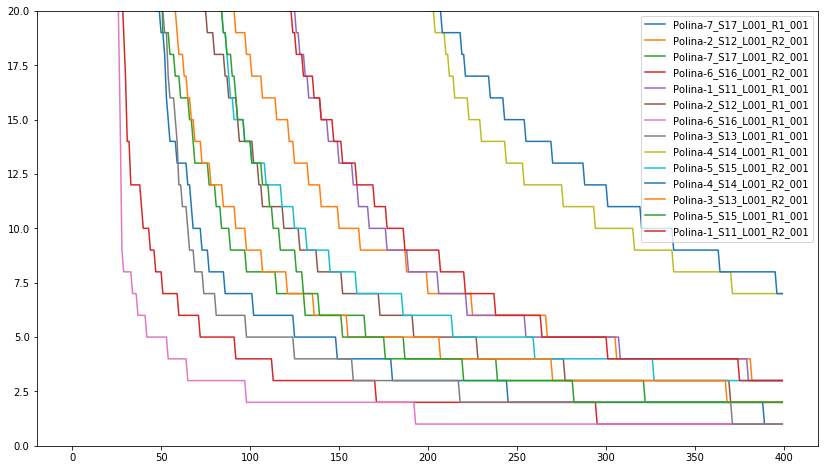

In [31]:
plt.figure(figsize = (14, 8))
plt.ylim((0,20))
for key in res.keys():
    res[key][1]
    plt.plot(([x for x in res[key][1].values()][0:400]), label = key)
    
plt.legend()

In [22]:
import pickle

In [23]:
pickle.dump(res, open("../data/clostr_Polina/res_0", 'wb'))

In [24]:
for key in sorted(res.keys()):
    print(key, res[key][0].sum())

Polina-1_S11_L001_R1_001 21279.0
Polina-1_S11_L001_R2_001 21590.0
Polina-2_S12_L001_R1_001 22445.0
Polina-2_S12_L001_R2_001 31286.0
Polina-3_S13_L001_R1_001 10976.0
Polina-3_S13_L001_R2_001 17696.0
Polina-4_S14_L001_R1_001 40577.0
Polina-4_S14_L001_R2_001 38656.0
Polina-5_S15_L001_R1_001 9640.0
Polina-5_S15_L001_R2_001 15793.0
Polina-6_S16_L001_R1_001 3977.0
Polina-6_S16_L001_R2_001 6716.0
Polina-7_S17_L001_R1_001 10637.0
Polina-7_S17_L001_R2_001 13162.0


Polina-2_S12_L001_R1_001_12_11pairsq10.txt


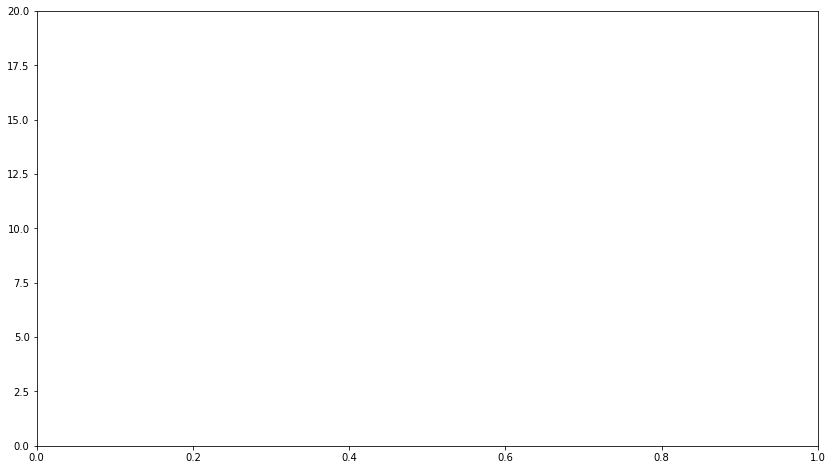

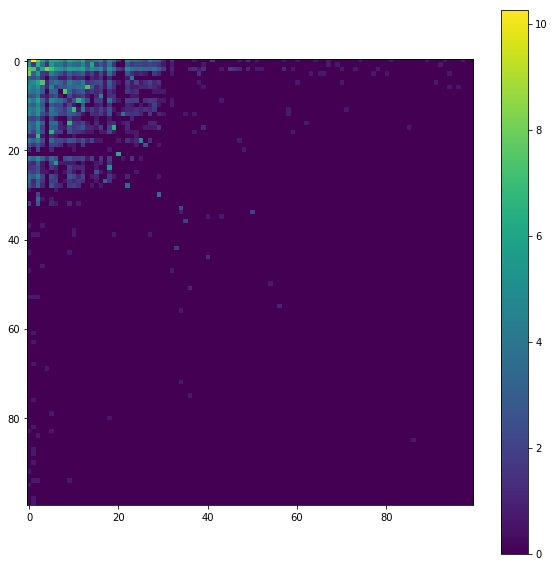

Polina-7_S17_L001_R1_001_12_11pairsq10.txt


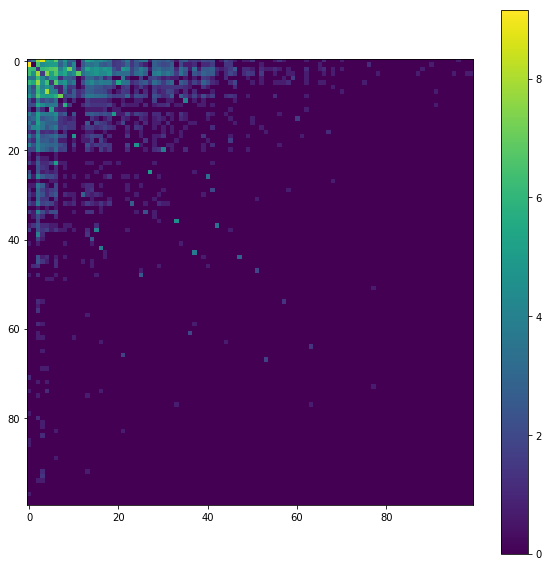

In [162]:
plt.figure(figsize = (14, 8))
plt.ylim((0,20))
for key in sorted(res_sof.keys()):
    print(key)
    pu.plot_gr(res_sof[key][0][:100, :100], log = 1)
    

In [29]:
import hamiltonian_utils as hamu

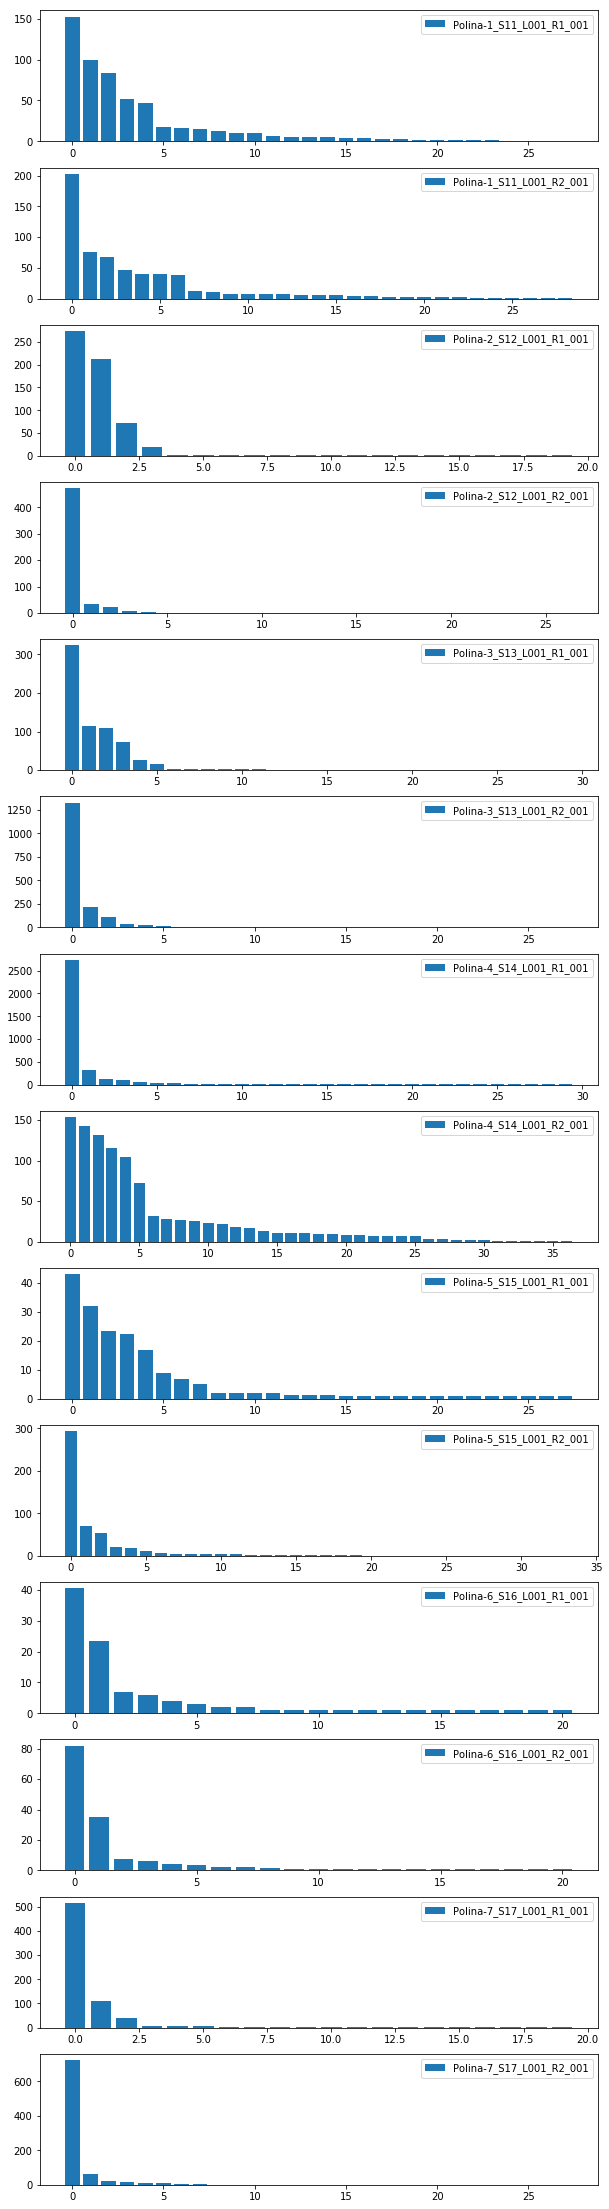

In [122]:
f = plt.figure(figsize=(10, 40))
axes = f.subplots(len(res.keys()), 1)

for key, ax in zip(sorted(res.keys())[:], axes):
    gr = res[key][0][:200, :200]
    arrays, weights = hamu.restore_arrays(gr)
    mask = hamu.list_to_gr(arrays, 200)
    ax.bar(np.arange(len(weights)), sorted([np.median(x) for x in weights])[::-1], label = key)
    ax.legend()
    #print("Name: ", key, "\nN arrays restored :", len(arrays), "\nNoise level :", gr[mask.astype(bool)].sum() / gr.sum())

In [123]:
f.savefig("../data/arrays_median_weights.png")

In [97]:
gr[mask.astype(bool)].sum() / gr.sum()

0.6618895031515194

In [157]:
for key in sorted([x for x in res.keys()]):
    print(key, res[key][0].sum())

Polina-1_S11_L001_R1_001 21295.0
Polina-1_S11_L001_R2_001 21600.0
Polina-2_S12_L001_R1_001 22468.0
Polina-2_S12_L001_R2_001 31299.0
Polina-3_S13_L001_R1_001 10991.0
Polina-3_S13_L001_R2_001 17707.0
Polina-4_S14_L001_R1_001 40620.0
Polina-4_S14_L001_R2_001 38675.0
Polina-5_S15_L001_R1_001 9672.0
Polina-5_S15_L001_R2_001 15812.0
Polina-6_S16_L001_R1_001 3979.0
Polina-6_S16_L001_R2_001 6719.0
Polina-7_S17_L001_R1_001 10639.0
Polina-7_S17_L001_R2_001 13167.0


## Load ans

In [27]:
with open("../data/answers/Clo_009089.txt") as f:
    ans_1 = [x[:-1].split(',')[1:] for x in f.readlines()]
with open("../data/answers/Clo_013316.txt") as f:
    ans_2 = [x[:-1].split(',')[1:] for x in f.readlines()]

In [30]:
keys = sorted([x for x in res.keys()])[::2]

for key in keys:
    sp_to_n = res[key][3]
    ans_1_n = [[sp_to_n[hu.find_closest(sp_to_n, x)[1]] for x in y] for y in ans_1]
    ans_2_n = [[sp_to_n[hu.find_closest(sp_to_n, x)[1]] for x in y] for y in ans_2]
    
    #max([x for x in sp_to_n.values()]) + 1#max([x for y in ans_1_n + ans_2_n for x in y])
    
    gr = res[key][0]
    max_n = gr.shape[0]
    gr_answ = hamu.list_to_gr(ans_1_n + ans_2_n, max_n )
    gr_restored = hamu.list_to_gr(hamu.restore_arrays(gr)[0], max_n )
    
    #print(gr_answ.shape, gr_restored.shape, gr.)
    
    #print(gr[gr_answ.astype(bool)].sum()/gr.sum(), gr[gr_restored.astype(bool)].sum()/gr.sum())
    
    cut = 200
    print(key, gr[:cut, :cut][gr_answ[:cut, :cut].astype(bool)].sum()/gr[:cut, :cut].sum(),
          gr[:cut, :cut][gr_restored[:cut, :cut].astype(bool)].sum()/gr[:cut, :cut].sum())
    
    

Polina-1_S11_L001_R1_001 0.12434794868179895 0.6651158419098642
Polina-2_S12_L001_R1_001 0.656671864557808 0.6533303631098241
Polina-3_S13_L001_R1_001 0.40606778425655976 0.5849125364431487
Polina-4_S14_L001_R1_001 0.17380408892417626 0.5626984914648671
Polina-5_S15_L001_R1_001 0.17219917012448133 0.6522821576763486
Polina-6_S16_L001_R1_001 0.08398290168468694 0.25873774201659544
Polina-7_S17_L001_R1_001 0.058381122496944625 0.3982325843752938


In [45]:
res['Polina-1_S11_L001_R1_001'][2]

{'GCGTACAAGGTTGAGAAGCTCCGCAATCTCAACGTCG': 0,
 'ACTGTATGCCATCTAAATGCATCATACAAACTTATTT': 1,
 'AACTTTATATCTCCATTTGCATATCCATCTGATGAAC': 2,
 'GCGTACAAGGTTGAGAAGCTCCGCAATCTCAACGTCGT': 0,
 'GAGGAGATTCAGACAGCGACTAAAAAGACTGATATAAA': 3,
 'AACTTTATATCTCCATTTGCATATCCATCTGATGAA': 2,
 'CAAAGTGCTAGGTCACTAAATGATGCAACAGTAGACG': 4,
 'CCTGTATTCTGTTTAATGCTTCAATAGCTCTTTCT': 5,
 'TATACTTCCTAATGCAATCAAATAAGTACCTAAAAT': 6,
 'ATTTGAAAGGAATAAATTTTAAATGAATGAAAGGATA': 7,
 'AGGATAAAGAAAAGACTCACACAAGACACAGTGTCAG': 8,
 'AGGATAAAGAAAAGACTCACACAAGACACAGTGTCA': 8,
 'TGGTATATCATACTCGTGCATTGCCTGCTCCACAT': 9,
 'AAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAAT': 10,
 'TATCTAAAACCCAATAGGATTGACACGTTACGACC': 11,
 'GACAAAGCGACTATTACTATCTCAGGTGATAAAAAT': 12,
 'TATCTAAAACCCAATAGGATTGACACGTTACGACCG': 11,
 'ACTGTATGCCATCTAAATGCATCATACAAACTTATT': 1,
 'CAGCCAAAAACTTCGAATTTGAACTAAAATGCGTG': 13,
 'CAAAGTGCTAGGTCACTAAATGATGCAACAGTAGAC': 4,
 'TCACACATGAGCAATATCGAAACAGGCAAATCTACA': 14,
 'TTGCTCCGCTATGCCTTGCGCTCTCTAATATCGCTT': 15,
 'ACAGCTCCCAAGACAT

In [126]:
keys = sorted([x for x in res.keys()])[::2]

In [164]:
key = keys[1]
sp_to_n = res[key][3]
ans_1_n = [[sp_to_n[hu.find_closest(sp_to_n, x)[1]] for x in y] for y in ans_1]
ans_2_n = [[sp_to_n[hu.find_closest(sp_to_n, x)[1]] for x in y] for y in ans_2]

In [165]:
sp_to_n

{'ACAAACAAGTGTAGGATAAACTTTCCTTGCCCAGTATA': 0,
 'TAACAAAATTTGCGAGTACACTTATTTCTAATATAT': 1,
 'GCAGAAGATTTAGCGACTGTTGTTGCTGAATGGGATG': 2,
 'ATTAAATTGCTCAGTCTAGTACTTAAAGAATTATAA': 3,
 'TAAGAATTAACTAATGTGAATTTTTTAGACATGTCAT': 4,
 'ACATTATCAACATCATCTAATTTTTTTGTCACTGT': 5,
 'CGAAAAATCTAGGAAAAACTATTGTAAAAGCGTTTA': 6,
 'AAGCTTTCATAGCATCCTCTTCTGAACATTCATCACT': 7,
 'TGCTGTGCCACAATTTGATGCTTCTATAGCTAAATTC': 8,
 'TAGTAAGTTAACTCATACATACCACCTTCCCCATAA': 9,
 'GTTTGAGAACGCTGTATAAAGCTTGTAGCTAGTTCT': 10,
 'TTTGATTACATGGGCAGTTTTTTATTATAGAGTGTT': 11,
 'AGTTTTAAAGAGGGCAGACCTAAAAAATATACTAAAA': 12,
 'TGACTCGTGCTATTTTTTTTACACGCCTAAGAGGTA': 13,
 'TACGACATTGAATAAAATGGGTACAGAGACAATTTATAA': 14,
 'CTTTTAAGTGCATCAAAGGAGTTACAAGCTATATTT': 15,
 'ATAAGAGTGGTTTAAGAAAATAAGTTATTTTTCAAA': 16,
 'TTTATAAATCTTTTAATGACTGTCTCTGATGGTACA': 17,
 'TATTATAAATCTTTAAATAGCCTTCTAAGCGTCTACTA': 18,
 'CCGCTTGGCAAATCATAAGAAGGATTATTTTCTCCAA': 19,
 'AACAAAAAAGATACATCTGTAACTAATTTTTATACT': 20,
 'AAAGGAATAGATGATATGATTGCTAATGCTGAACAACAA': 21,
 'TTG

In [142]:
max_n = max([x for y in ans_1_n + ans_2_n for x in y])

In [143]:
gr_answ = hamu.list_to_gr(ans_1_n + ans_2_n, max_n + 1)

In [144]:
gr = res[key][0][:max_n+1,:max_n+1]

In [145]:
gr[gr_answ.astype(bool)].sum()/gr.sum()

0.6559996439380452

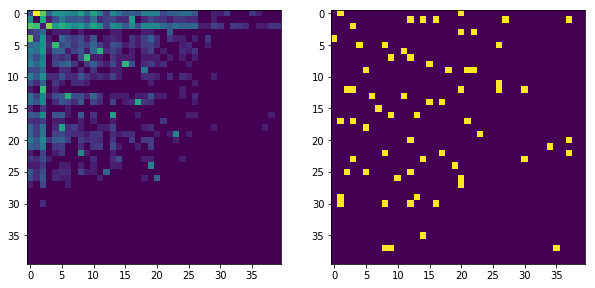

In [146]:
cut = 40
pu.plot_grs(gr[:cut,:cut],  gr_answ[:cut, :cut], log = 1)

In [76]:
hamu.restore_arrays(gr)[0]

[[31, 3, 2, 0, 7, 13, 42, 24, 12, 27, 36],
 [59, 4, 5, 11, 8, 18, 26, 85, 56, 64, 63],
 [33, 23, 1, 6, 30, 38, 103],
 [100, 54, 10, 9, 40, 77],
 [41, 20, 15, 21, 14, 35, 108, 134],
 [109, 19, 17, 113],
 [37, 25, 29, 58, 72],
 [102, 39, 32, 60],
 [94, 16, 71, 22, 51, 87],
 [50, 46, 65, 44, 81, 48, 78, 119, 79, 105],
 [130, 84, 43, 62, 91, 116, 49],
 [181, 47, 57],
 [52, 55, 90, 67, 28, 34, 88],
 [125, 45, 74],
 [132, 66, 104, 149],
 [114, 61, 80],
 [69, 98],
 [97, 99, 101, 138],
 [70, 92],
 [68, 96],
 [83, 112],
 [106, 82],
 [111, 89, 110],
 [117, 86],
 [121, 122],
 [126, 142],
 [53, 75],
 [161, 162],
 [93, 123],
 [95, 73, 202],
 [129, 136]]

In [89]:
ans_1_n

[[23, 61, 16, 9, 22, 17, 3, 7, 18, 8, 57, 14, 11, 1, 1],
 [27, 43, 12, 20, 0, 20, 5, 8, 6, 3, 20, 14],
 [1, 3, 52, 52, 11, 2, 17, 1],
 [7, 9, 18, 5, 4, 0, 1, 16, 13, 6, 11, 26, 20],
 [10, 13, 20, 20, 1, 59, 6, 12, 0, 7, 12, 20, 57, 8],
 [12, 3, 12, 22, 5, 7],
 [12, 26, 10],
 [52, 4, 43, 15, 7, 59],
 [25, 5, 20, 25, 8, 6, 1, 12, 1, 20, 6, 11, 41, 3, 48, 5, 26, 7, 63]]

In [47]:
hu.find_closest(sp_to_n, 'TGAACTTTAATCGGTTTTATACAACAATATAACGC')

(0, 'TGAACTTTAATCGGTTTTATACAACAATATAACGC')

In [35]:
gr = pairs[0]

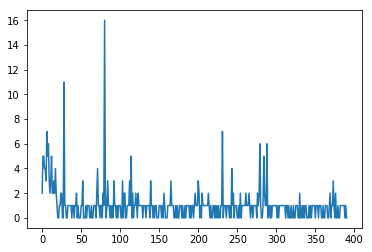

In [46]:
plt.plot(gr.sum(0)[30:])

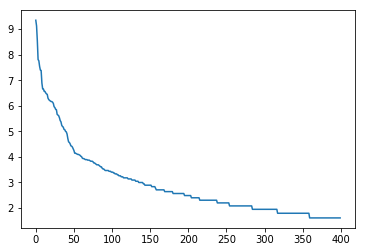

In [61]:
plt.plot(np.log([x for x in pairs[1].values()][:400]))